In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen


from itertools import combinations

import IPython
from IPython.display import display, Image
from PIL import Image

import numpy as np
import pandas as pd

import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
smile = pd.read_csv(r'C:\python projrct\python project 1\ann project\SMILES_Big_Data_Set.csv')
display(smile)

,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.15910
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.67430
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.53610
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.95100
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.21300
...,...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314ed50>,24,3.21560
16083,S=C=NCCCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314edc0>,19,5.45270
16084,S=C=NCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314ee30>,17,4.67250
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314eea0>,22,3.93289


In [3]:
# Convert SMILES strings to RDKit molecules
smile['mol'] = smile['SMILES'].apply(Chem.MolFromSmiles)

# Define a function to calculate descriptors
def calculate_descriptors(mol):
    mol_weight = Descriptors.MolWt(mol)
    mr = Crippen.MolMR(mol)
    num_h_donors = Descriptors.NumHDonors(mol)
    num_h_acceptors = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    return pd.Series({
        'Molecular_Weight': mol_weight,
        'MR': mr,
        'Num_H_Donors': num_h_donors,
        'Num_H_Acceptors': num_h_acceptors,
        'PSA': psa
    })

# Apply the function to calculate descriptors for each molecule in the 'mol' column
descriptors_df = smile['mol'].apply(calculate_descriptors)

# Merge the calculated descriptors DataFrame with the existing DataFrame
data_with_descriptors = pd.concat([smile, descriptors_df], axis=1)

# Display the updated DataFrame
display(data_with_descriptors)


,SMILES,pIC50,mol,num_atoms,logP,Molecular_Weight,MR,Num_H_Donors,Num_H_Acceptors,PSA
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x000002AF7BA...,25,4.15910,367.455,100.1015,1.0,5.0,71.95
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x000002AF7BA...,36,3.67430,506.434,131.4015,4.0,6.0,149.78
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x000002AF7BA...,23,1.53610,317.389,87.1695,3.0,5.0,101.37
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x000002AF7BA...,22,0.95100,301.394,86.7670,3.0,5.0,98.96
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x000002AF7BA...,21,3.21300,294.383,90.2544,2.0,3.0,49.84
...,...,...,...,...,...,...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x000002AF882...,24,3.21560,333.420,99.9114,2.0,4.0,62.20
16083,S=C=NCCCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x000002AF882...,19,5.45270,275.461,86.9750,0.0,2.0,12.36
16084,S=C=NCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x000002AF882...,17,4.67250,247.407,77.7410,0.0,2.0,12.36
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x000002AF882...,22,3.93289,306.394,89.7887,1.0,4.0,38.54


In [4]:
df = data_with_descriptors[['SMILES', 'num_atoms', 'Molecular_Weight', 'logP', 'MR', 'Num_H_Donors', 'Num_H_Acceptors', 'PSA', 'pIC50']]
display(df)

,SMILES,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,25,367.455,4.15910,100.1015,1.0,5.0,71.95,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,36,506.434,3.67430,131.4015,4.0,6.0,149.78,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,23,317.389,1.53610,87.1695,3.0,5.0,101.37,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,22,301.394,0.95100,86.7670,3.0,5.0,98.96,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,21,294.383,3.21300,90.2544,2.0,3.0,49.84,4.59
...,...,...,...,...,...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,24,333.420,3.21560,99.9114,2.0,4.0,62.20,0.00
16083,S=C=NCCCCCCCCCCc1ccccc1,19,275.461,5.45270,86.9750,0.0,2.0,12.36,0.00
16084,S=C=NCCCCCCCCc1ccccc1,17,247.407,4.67250,77.7410,0.0,2.0,12.36,0.00
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,22,306.394,3.93289,89.7887,1.0,4.0,38.54,0.00


In [5]:
missing_values = df.isnull()
print(missing_values)
missing_counts = missing_values.sum()
print(missing_counts)


       SMILES  num_atoms  Molecular_Weight   logP     MR  Num_H_Donors  \
0       False      False             False  False  False         False   
1       False      False             False  False  False         False   
2       False      False             False  False  False         False   
3       False      False             False  False  False         False   
4       False      False             False  False  False         False   
...       ...        ...               ...    ...    ...           ...   
16082   False      False             False  False  False         False   
16083   False      False             False  False  False         False   
16084   False      False             False  False  False         False   
16085   False      False             False  False  False         False   
16086   False      False             False  False  False         False   

       Num_H_Acceptors    PSA  pIC50  
0                False  False  False  
1                False  False  Fa

In [6]:
missing_values_row = df[df.isnull().any(axis=1)]
# Display rows with missing values
print("Rows with missing values:")
print(missing_values_row)
display("Rows with missing values exported to 'C:\python projrct\python project 1\ann project\missing_values.xlsx'")

Rows with missing values:
                                                  SMILES  num_atoms  \
1915   COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12         24   
1919                                         CC(O)C(=O)O          6   
1940                                OCC(O)C(O)C(O)C(O)CO         12   
1941                              O=C1NC(=O)C(=O)C(=O)N1         10   
1944                              O=C1OC(C(O)CO)C(O)=C1O         12   
...                                                  ...        ...   
16028                  OCCCNc1ncnc2c1ncn2C1OC(CO)C(O)C1O         23   
16031                     OCCN1CCN(CCCOn2nnc3ccccc32)CC1         22   
16032                    O=C(Cn1ncc([N+](=O)[O-])n1)NCCO         15   
16033                               OCCNc1ncnc2nc[nH]c12         13   
16034                   OCCNc1ncnc2c1ncn2C1OC(CO)C(O)C1O         22   

       Molecular_Weight    logP       MR  Num_H_Donors  Num_H_Acceptors  \
1915            334.332 -1.6512  80.1105      

"Rows with missing values exported to 'C:\\python projrct\\python project 1\x07nn project\\missing_values.xlsx'"

In [7]:
display(df)
df_wm = df.dropna() 
display(df_wm)

,SMILES,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,25,367.455,4.15910,100.1015,1.0,5.0,71.95,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,36,506.434,3.67430,131.4015,4.0,6.0,149.78,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,23,317.389,1.53610,87.1695,3.0,5.0,101.37,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,22,301.394,0.95100,86.7670,3.0,5.0,98.96,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,21,294.383,3.21300,90.2544,2.0,3.0,49.84,4.59
...,...,...,...,...,...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,24,333.420,3.21560,99.9114,2.0,4.0,62.20,0.00
16083,S=C=NCCCCCCCCCCc1ccccc1,19,275.461,5.45270,86.9750,0.0,2.0,12.36,0.00
16084,S=C=NCCCCCCCCc1ccccc1,17,247.407,4.67250,77.7410,0.0,2.0,12.36,0.00
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,22,306.394,3.93289,89.7887,1.0,4.0,38.54,0.00


,SMILES,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,25,367.455,4.15910,100.1015,1.0,5.0,71.95,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,36,506.434,3.67430,131.4015,4.0,6.0,149.78,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,23,317.389,1.53610,87.1695,3.0,5.0,101.37,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,22,301.394,0.95100,86.7670,3.0,5.0,98.96,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,21,294.383,3.21300,90.2544,2.0,3.0,49.84,4.59
...,...,...,...,...,...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,24,333.420,3.21560,99.9114,2.0,4.0,62.20,0.00
16083,S=C=NCCCCCCCCCCc1ccccc1,19,275.461,5.45270,86.9750,0.0,2.0,12.36,0.00
16084,S=C=NCCCCCCCCc1ccccc1,17,247.407,4.67250,77.7410,0.0,2.0,12.36,0.00
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,22,306.394,3.93289,89.7887,1.0,4.0,38.54,0.00


'Click on the photo to zoom it'

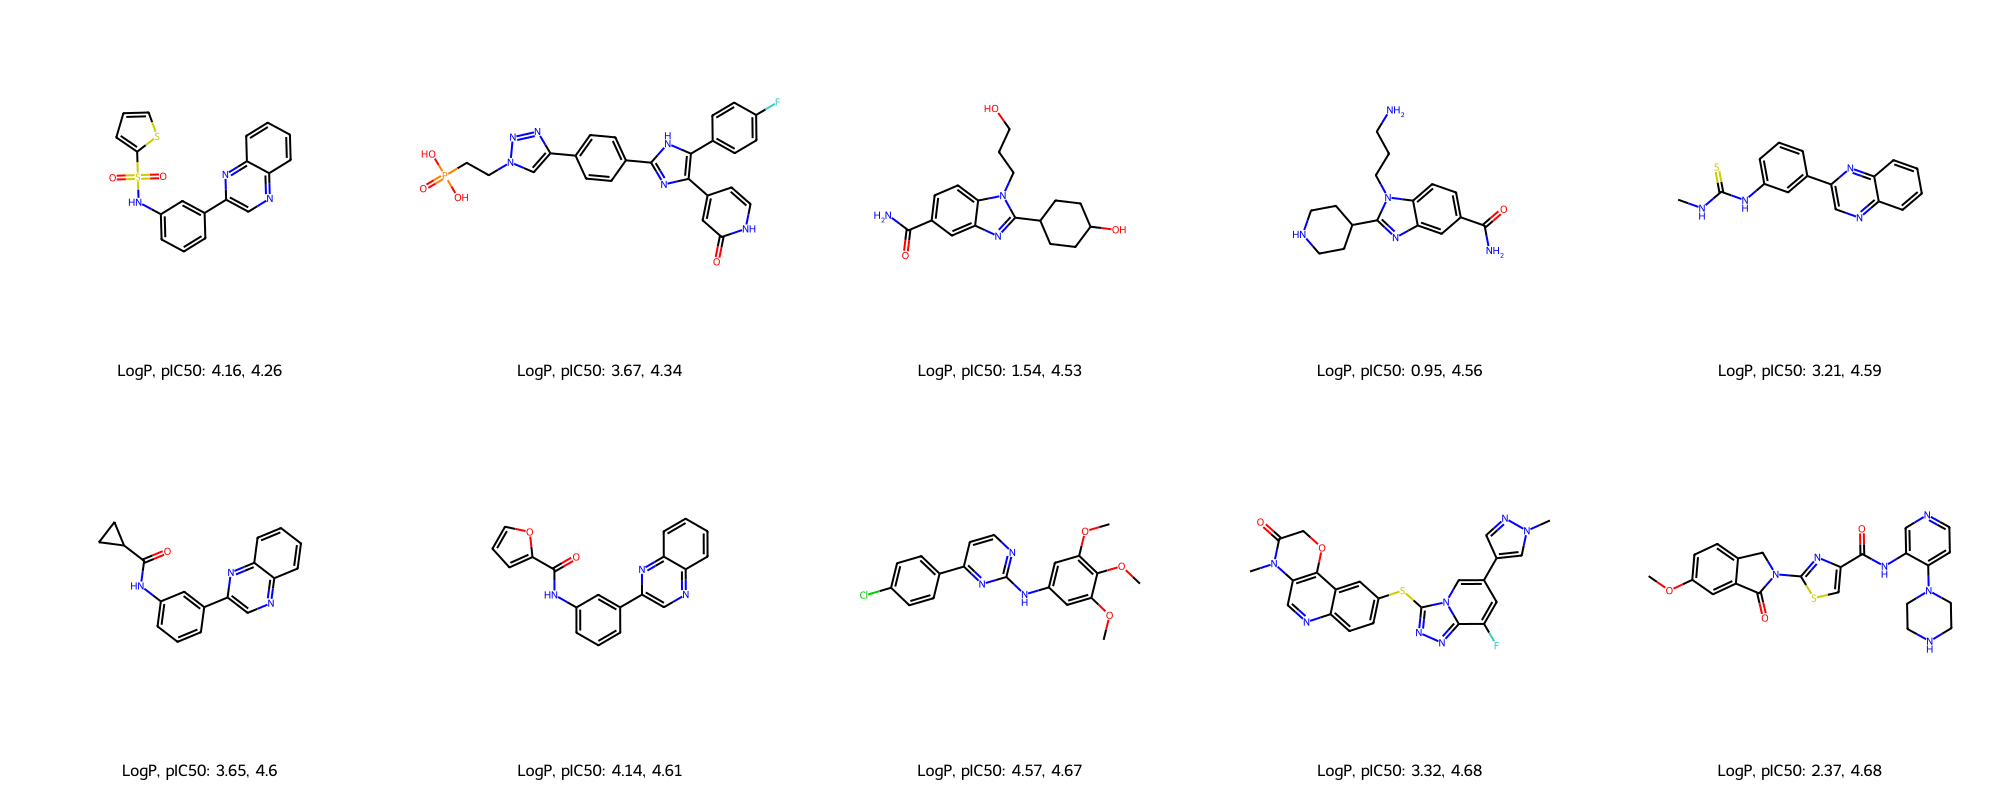

In [8]:
import IPython

from IPython.display import display, Image
from PIL import Image

def show_smiles(smiles):
  """
  generate 2D representations of the molecules and color-code them by logP, pIC50
  :param data_frame: list of smiles
  """
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

  # Draw the first molecules
  img = Draw.MolsToGridImage(molecules[:10], molsPerRow=5, subImgSize=(400,400),
                             legends=[f'LogP, pIC50: {round(row["logP"], 2)}, {round(row["pIC50"], 2)}' for index, row in df.iterrows()])

                             
  from IPython.display import display, Image
  display("Click on the photo to zoom it")
  display(img)

show_smiles(df["SMILES"])

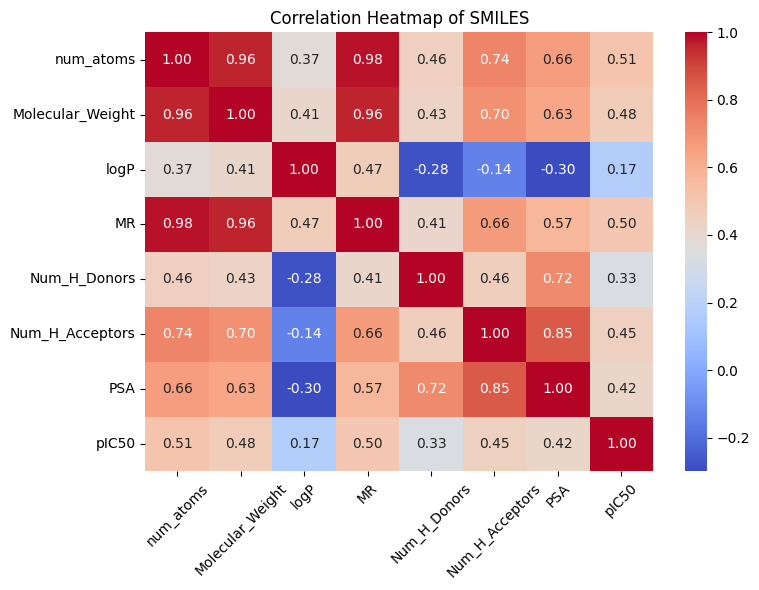

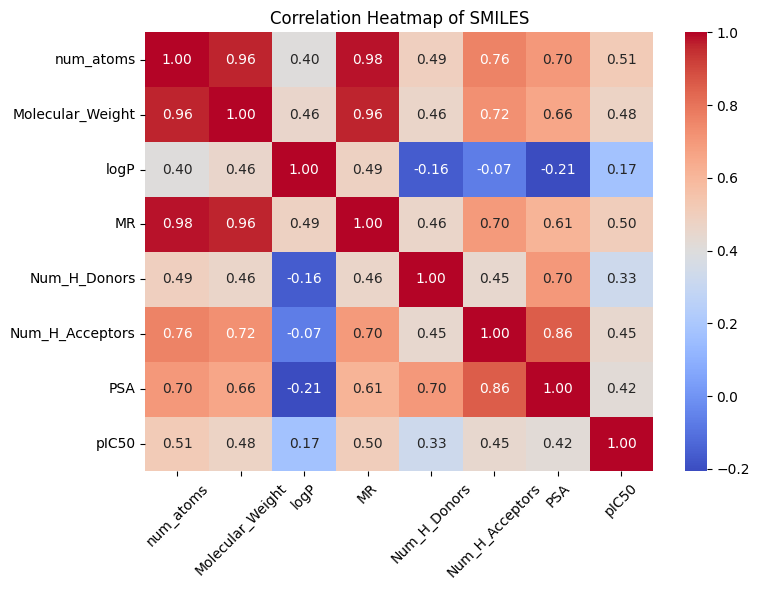

In [9]:
corr = df.drop('SMILES', axis = 1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of SMILES')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

corr = df_wm.drop('SMILES', axis = 1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of SMILES')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

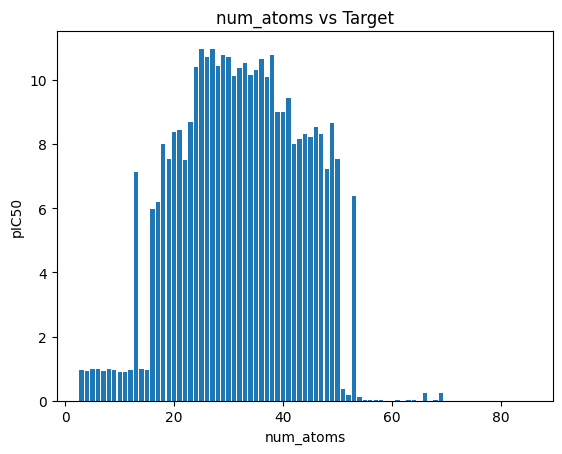

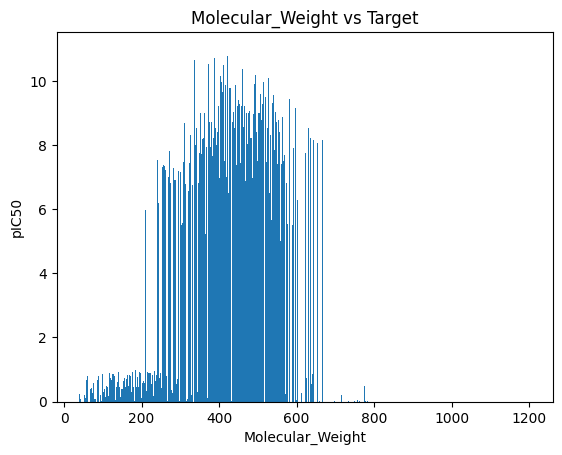

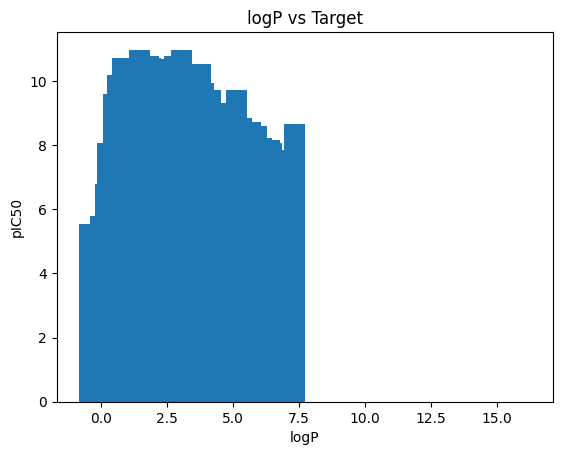

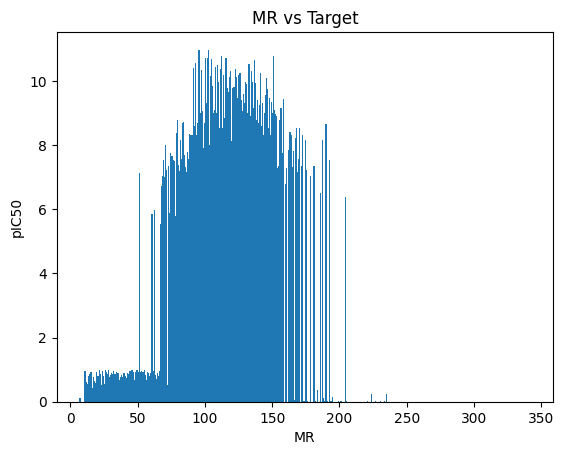

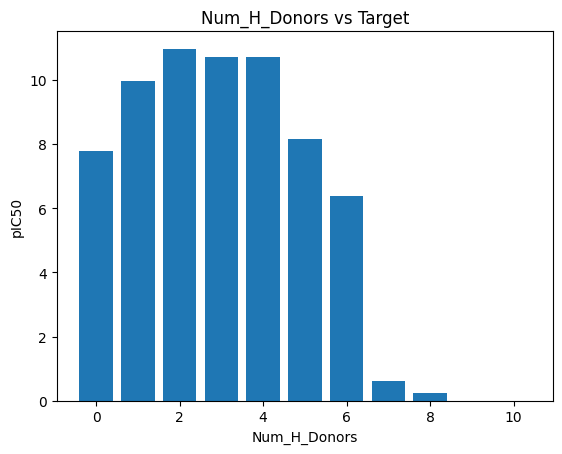

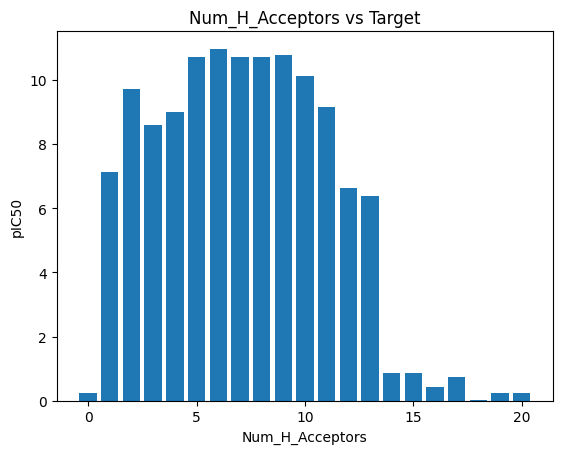

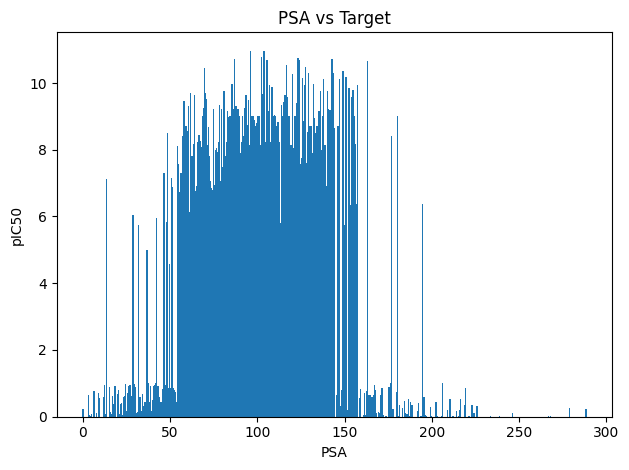

In [10]:
x = df.drop(['SMILES', 'pIC50'], axis=1)
y = df['pIC50']

for col in x.columns:
    plt.figure()
    plt.bar(df[col], y)
    plt.xlabel(col)
    plt.ylabel('pIC50')
    plt.title(f'{col} vs Target')

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Smiles'] = label_encoder.fit_transform(df['SMILES']).astype(np.float32)
display(df['Smiles'])

df_wm['Smiles'] = label_encoder.fit_transform(df_wm['SMILES']).astype(np.float32)
display(df_wm['Smiles'])


0        14499.0
1        14968.0
2        12145.0
3        12413.0
4         7099.0
          ...   
16082    15454.0
16083    15471.0
16084    15472.0
16085    15499.0
16086    11918.0
Name: Smiles, Length: 16087, dtype: float32

C:\Users\sound\AppData\Local\Temp\ipykernel_46968\289556259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wm['Smiles'] = label_encoder.fit_transform(df_wm['SMILES']).astype(np.float32)


0        13596.0
1        14005.0
2        11503.0
3        11720.0
4         6699.0
          ...   
16082    14413.0
16083    14429.0
16084    14430.0
16085    14457.0
16086    11304.0
Name: Smiles, Length: 15037, dtype: float32

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

feature_columns = ['Smiles', 'num_atoms', 'Molecular_Weight', 'logP', 'MR', 'Num_H_Donors', 'Num_H_Acceptors', 'PSA']


X = df[feature_columns]
y = df['pIC50']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the data
display('X_train: ')
display(X_train.head())
display('X_test: ')
display(X_test.head())
display('y_train: ')
display(y_train.head())
display('y_test: ')
display(y_test.head())



'X_train: '

,Smiles,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA
5331,4527.0,13,203.351,3.37160,60.3000,0.0,2.0,20.31
1183,8184.0,35,490.995,4.24820,137.3847,1.0,7.0,75.00
11998,5234.0,24,334.336,1.12200,83.6717,1.0,8.0,111.47
12581,14937.0,25,376.178,3.41230,92.2350,0.0,6.0,65.60
7517,10624.0,17,261.303,0.92292,62.5412,0.0,6.0,95.10


'X_test: '

,Smiles,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA
8658,10836.0,18,360.882,7.27400,81.9380,0.0,0.0,0.00
14349,3411.0,26,352.390,2.78280,94.9087,1.0,4.0,75.71
15290,9533.0,24,330.384,2.17542,92.7723,1.0,6.0,71.77
4269,14763.0,13,174.159,2.14300,48.3974,0.0,3.0,56.03
9520,447.0,23,315.377,1.34670,87.5659,2.0,5.0,83.14


'y_train: '

5331     0.00
1183     7.67
11998    0.08
12581    0.00
7517     0.12
Name: pIC50, dtype: float64

'y_test: '

8658     0.00
14349    0.00
15290    0.01
4269     0.01
9520     0.05
Name: pIC50, dtype: float64

In [13]:
feature_columns = ['Smiles', 'num_atoms', 'Molecular_Weight', 'logP', 'MR', 'Num_H_Donors', 'Num_H_Acceptors', 'PSA']

X = df_wm[feature_columns]
y = df_wm['pIC50']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the data
display('X_train1: ')
display(X_train1.head())
display('X_test1: ')
display(X_test1.head())
display('y_train1: ')
display(y_train1.head())
display('y_test1: ')
display(y_test1.head())

'X_train1: '

,Smiles,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA
6655,4734.0,20,278.304,2.20480,74.2370,0.0,5.0,61.83
4567,9551.0,20,296.392,2.31562,76.9052,2.0,3.0,75.27
1068,11075.0,24,344.806,3.02888,89.8826,2.0,6.0,109.62
13887,3290.0,50,701.994,3.91090,197.0843,5.0,8.0,155.25
5056,14602.0,17,225.255,1.91660,64.5684,2.0,4.0,66.49


'X_test1: '

,Smiles,num_atoms,Molecular_Weight,logP,MR,Num_H_Donors,Num_H_Acceptors,PSA
14244,14030.0,12,162.144,1.49860,44.1488,1.0,3.0,50.44
13482,6829.0,16,249.290,2.04830,59.9934,2.0,6.0,62.73
6751,2606.0,9,128.175,1.54220,35.8140,0.0,2.0,32.67
5257,1087.0,11,215.046,2.37440,45.4510,0.0,2.0,26.30
13301,5392.0,13,210.283,1.61896,50.6984,0.0,4.0,64.65


'y_train1: '

6655     0.01
4567     0.00
1068     7.51
13887    0.00
5056     0.01
Name: pIC50, dtype: float64

'y_test1: '

14244    0.03
13482    0.01
6751     0.03
5257     0.00
13301    0.02
Name: pIC50, dtype: float64

In [14]:
print('Shape of X-train:', X_train.shape)
print('Shape of X-test:', X_test.shape)
print('Shape of y-test:', y_train.shape)
print('Shape of y-test:', y_test.shape)
print('Shape of X-train1:', X_train1.shape)
print('Shape of X-test1:', X_test1.shape)
print('Shape of y-test1:', y_train1.shape)
print('Shape of y-test1:', y_test1.shape)

Shape of X-train: (12869, 8)
Shape of X-test: (3218, 8)
Shape of y-test: (12869,)
Shape of y-test: (3218,)
Shape of X-train1: (12029, 8)
Shape of X-test1: (3008, 8)
Shape of y-test1: (12029,)
Shape of y-test1: (3008,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()

# Train the model using your X_train and y_train data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


C:\Users\sound\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)                │        576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━

In [20]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Sequential, model_from_json

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Single output neuron for regression

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()

# Train the model using your X_train and y_train data
history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_data=(X_test1, y_test1), verbose=1)

# Save the model including architecture and weights to a single file
model.save('my_model.h5')



C:\Users\sound\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)                │        576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 267401.1875 - mae: 283.5796 - val_loss: 6.7135 - val_mae: 0.9749
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44.8644 - mae: 1.5513 - val_loss: 6.2627 - val_mae: 1.1135
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.1252 - mae: 1.3062 - val_loss: 5.9895 - val_mae: 1.2926
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2585 - mae: 1.3845 - val_loss: 5.8702 - val_mae: 1.4446
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4949 - mae: 1.5086 - val_loss: 5.8425 - val_mae: 1.5199
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4444 - mae: 1.5651 - val_loss: 5.8391 - val_mae: 1.5657
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3018 - mae: 1.6098 - val_loss: 5.8375 - val_mae: 1.5835
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2288 - mae: 1.6167 - val_loss: 5.8379 - val_mae: 1.5939
Epoch 9/100
376/376 ━━━━━━━━━━━━━━━━━━━

In [19]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load your new dataset here using Pandas read_excel
data = pd.read_excel(r'C:\python projrct\python project 1\ann project\missing_values.xlsx')
print(data)



label_encoder = preprocessing.LabelEncoder()
data['Smiles'] = label_encoder.fit_transform(data['SMILES']).astype(np.float32)
display(data['Smiles'])

# Drop the 'PLC50' column if present (assuming it's the target)
if 'PLC50' in data.columns:
    target_data = data['PLC50']  # This will be used to store predictions later
    data = data.drop('PLC50', axis=1)

                                                 SMILES  num_atoms  \
0     COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12         24   
1                                           CC(O)C(=O)O          6   
2                                  OCC(O)C(O)C(O)C(O)CO         12   
3                                O=C1NC(=O)C(=O)C(=O)N1         10   
4                                O=C1OC(C(O)CO)C(O)=C1O         12   
...                                                 ...        ...   
1045                  OCCCNc1ncnc2c1ncn2C1OC(CO)C(O)C1O         23   
1046                     OCCN1CCN(CCCOn2nnc3ccccc32)CC1         22   
1047                    O=C(Cn1ncc([N+](=O)[O-])n1)NCCO         15   
1048                               OCCNc1ncnc2nc[nH]c12         13   
1049                   OCCNc1ncnc2c1ncn2C1OC(CO)C(O)C1O         22   

      Molecular_Weight    logP       MR  Num_H_Donors  Num_H_Acceptors  \
0              334.332 -1.6512  80.1105             3                8   
1          

0        442.0
1        182.0
2        997.0
3        880.0
4        889.0
         ...  
1045    1029.0
1046    1033.0
1047     835.0
1048    1036.0
1049    1035.0
Name: Smiles, Length: 1050, dtype: float32

In [ ]:
# Assuming X_new_data is the processed DataFrame without the target 'PLC50' column
columns_to_select = ['Smiles', 'num_atoms', 'Molecular_Weight', 'logP', 'MR', 'Num_H_Donors', 'Num_H_Acceptors', 'PSA']
X_new_data = data[columns_to_select]  

X_new_data = X_new_data.astype('float32')

# Load the model including architecture and weights from the file
loaded_model = load_model('my_model.h5') 

# Use the loaded model to predict 'PLC50' for the new dataset
predicted_values = loaded_model.predict(X_new_data)

# Now you can combine the predictions with the original data (if needed)

data['Predicted_PLC50'] = predicted_values
print(data['Predicted_PLC50'])

my_list = predicted_values 
my_formatted_list = [ '%.2f' % elem for elem in my_list ]

# Save the DataFrame to an Excel file
data.to_excel(r'C:\python projrct\python project 1\ann project\my_formatted_list.xlsx', index=False)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0       0.131666
1       0.120472
2       0.477871
3       0.417265
4       0.396919
          ...   
1045    0.424845
1046    0.624269
1047    0.422289
1048    0.328882
1049    0.409307
Name: Predicted_PLC50, Length: 1050, dtype: float32
